# Analiza piłkarzy na podstawie danych z gry FIFA 24

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie
Poznanymi metodami statystycznymi uporządkowaliśmy piłkarzy występujących w grze **FIFA 24**. Dane pozyskaliśmy z dostępnej bazy danych w serwisie [Kaggle](https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset?resource=download) udostępnionych na licencji Apache 2.0. W celu przeanalizowania dostępnych danych skorzystaliśmy z takich metod jak <u>TOPSIS</u>, <u>SSW</u> oraz <u>regresji liniowej</u> co umożliwiło nam dojście do później opisanych wniosków.

## Słowa kluczowe
- **TOPSIS** - metoda wielokryterialnej analizy decyzyjnej, która służy do wyboru najlepszego wariantu spośród zestawu alternatyw
- **SSW** - oznacza "Sum of Squares Within" (Suma Kwadratów Wewnątrzgrupowych), jest jednym z komponentów analizy wariancji (ANOVA), która służy do analizy różnic między średnimi kilku grup danych
- **Metoda Hellwiga** - metoda ta jest wykorzystywana w analizie skupień (klasyfikacji), która pomaga w identyfikacji podobieństwa między obserwacjami. Opiera się na minimalizacji wariancji wewnątrz klastra oraz maksymalizacji wariancji między klastrami. Hellwig zaproponował tę metodę, aby skutecznie zgrupować dane o różnym poziomie zmienności.
- **Metoda Strahl'a** - Metoda ta, również stosowana w analizie skupień, koncentruje się na maksymalizacji różnic między klastrami poprzez minimalizację sumy kwadratów odległości wewnątrz klastra. Strahl zaproponował tę technikę, aby skutecznie oddzielić klastry o różnych charakterystykach.
- **Metoda Nowaka** - znana również jako metoda najmniejszych kwadratów (Least Squares Method), jest używana w analizie regresji. Polega ona na minimalizacji sumy kwadratów różnic między wartościami obserwowanymi a wartościami przewidywanymi przez model regresji. Metoda ta jest często wykorzystywana do dopasowania funkcji matematycznej do zestawu danych, co umożliwia prognozowanie wartości na podstawie innych zmiennych.
- **Metoda Muza** - znana także jako metoda optymalizacji wielokryterialnej, jest używana do wyboru najlepszego rozwiązania spośród wielu możliwych wariantów. Opiera się na analizie wielu kryteriów jednocześnie i poszukiwaniu rozwiązania, które najlepiej spełnia wszystkie kryteria jednocześnie. Metoda ta jest szczególnie przydatna w sytuacjach, gdzie istnieje wiele konkurujących ze sobą celów lub ograniczeń.

## Wprowadzenie

W świecie sportu analiza danych staje się coraz bardziej powszechną praktyką, która pozwalaja zarówno zawodnikom, jak i zespołom trenerskim na podejmowanie bardziej świadomych decyzji. W ramach niniejszego badania, skupiliśmy się na analizie piłkarzy występujących w grze FIFA 24.

### Przedmiot badania
Przedmiotem badania są piłkarze z całego świata, którzy występują w grze FIFA 24.


### Cel i zakres badania 
Celem naszego badania jest porównanie piłkarzy z różnych krajów oraz klubów. Postawiliśmy sobie za cel uporządkowanie ich od najlepszego do najgorszego stosując trzy metody statystyczne.


### Zmienne wybrane do analizy

Z dostępnych danych zostały wybrane jedynie te, które zostały uznane za znaczące a niektóre z nich, takie jak *ball_uncontrol* powstały z ich odpowiadających cech w celu uzyskania destymulanty.

Opis danych występujących w bazie:
- **player** - imię oraz nazwisko piłkarza
- **country** - narodowość lub kraj pochodzenia piłkarza
- **height** - wzrost piłkarza w centymetrach
- **age** - wiek piłkarza
- **club** - klub w którym piłkarz aktualnie gra
- **dribbling** - umiejętności piłkarza w drybblingu
- **reactions** - czas reakcji piłkarza
- **interceptions** - umiejętność piłkarza w przechwytywaniu podań
- **vision** - zdolność przeglądu pola gry piłkarza na boisku
- **stamina** - poziom wytrzymałości piłkarza
- **strength** - poziom siły piłkarza
- **balance** - balans piłkarza podczas gry
- **sprint_speed** - prędkość piłkarza podczas sprintów
- **agility** - poziom zwinności piłkarza
- **ball_uncontrol** - poziom braku kontroli nad piłką piłkarza
- **instability** - poziom niestabilności podczas gry
- **age_destimulant** - różnica wieku piłkarza od optymalnego wieku 28 lat

Za stymulante służą następujące dane: *dribbling*, *reactions*, *interceptions*, *vision*, *stamina*, *strength*, *balance*, *sprint_speed* oraz *agility*. Destymulantą jest z kolei *ball_uncontrol*, *instability* *age_destimulant*.

## DODAĆ TABELKE!!!!!

## Import odpowiednich bibliotek oraz przegląd danych

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from plotly.offline import iplot, plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
seed = 2024

In [3]:
data = pd.read_excel('FIFA_MAD_dane.xlsx')
data.head()

,player,country,height,age,club,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,Cristian Castro Devenish,Colombia,192,22,Atl. Nacional,43,68,65,30,55,86,40,52,43,45,50,6
1,Silaldo Taffarel,Brazil,181,31,Corinthians,70,70,70,64,87,81,42,67,65,31,46,3
2,Thomas Dähne,Germany,193,29,Holstein Kiel,12,65,20,49,38,68,41,48,36,75,52,1
3,Michael Sollbauer,Austria,187,33,SK Rapid Wien,48,64,66,29,73,82,56,63,57,54,30,5
4,Diego Segovia,Uruguay,191,23,Independiente,8,50,12,38,28,64,24,31,34,86,66,5


In [4]:
data.describe()

,height,age,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
count,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000,5680.000000
mean,181.671831,26.315845,56.116373,61.948768,47.392958,54.455458,63.369366,65.378169,64.063204,64.949648,63.770246,41.098239,41.388732,4.232746
std,6.829680,4.730292,18.764235,8.876965,20.453887,13.696858,16.103125,12.625184,14.492776,15.108142,14.850367,16.560609,12.015176,2.700600
min,156.000000,17.000000,5.000000,32.000000,3.000000,10.000000,14.000000,25.000000,20.000000,13.000000,21.000000,6.000000,4.000000,0.000000
25%,177.000000,23.000000,51.000000,56.000000,28.000000,45.000000,56.000000,58.000000,56.000000,57.000000,56.000000,31.000000,33.000000,2.000000
50%,182.000000,26.000000,62.000000,62.000000,54.000000,56.000000,66.000000,66.000000,66.000000,68.000000,66.000000,37.000000,40.000000,4.000000
75%,186.000000,30.000000,68.000000,68.000000,64.000000,65.000000,74.000000,74.000000,74.000000,75.000000,74.000000,45.000000,48.000000,6.000000
max,204.000000,41.000000,95.000000,93.000000,89.000000,94.000000,95.000000,96.000000,95.000000,97.000000,93.000000,92.000000,87.000000,13.000000


### Wstępna analiza danych

In [5]:
values = pd.read_excel('FIFA_MAD_dane.xlsx', sheet_name='wartosci')
values.head(9)

,,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,Średnia,56.12,61.95,47.39,54.46,63.37,65.38,64.06,64.95,63.77,41.10,41.39,4.23
1,Odchylenie standardowe,18.76,8.88,20.45,13.70,16.10,12.62,14.49,15.11,14.85,16.56,12.01,2.70
2,Mediana,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00,4.00
3,Kwartyl 25%,51.00,56.00,28.00,45.00,56.00,58.00,56.00,57.00,56.00,31.00,33.00,2.00
4,Kwatyl 50%,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00,4.00
5,Kwatyl 75%,68.00,68.00,64.00,65.00,74.00,74.00,74.00,75.00,74.00,45.00,48.00,6.00
6,Minimum,5.00,32.00,3.00,10.00,14.00,25.00,20.00,13.00,21.00,6.00,4.00,0.00
7,Maksimum,95.00,93.00,89.00,94.00,95.00,96.00,95.00,97.00,93.00,92.00,87.00,13.00
8,Skośność,-1.22,-0.09,-0.41,-0.34,-0.95,-0.42,-0.64,-0.94,-0.67,1.40,0.50,0.37


### Boxploty

Poniżej przedstawiono graficzny rozkład posiadanych przez nas cech statystycznych. W przypadku niektórych z nich, takich jak driblling można zauważyć dużą część wartości odstających, które pokazują jak zróżnicowane są dane. Nie świadczą one o błędach pomiarowych.

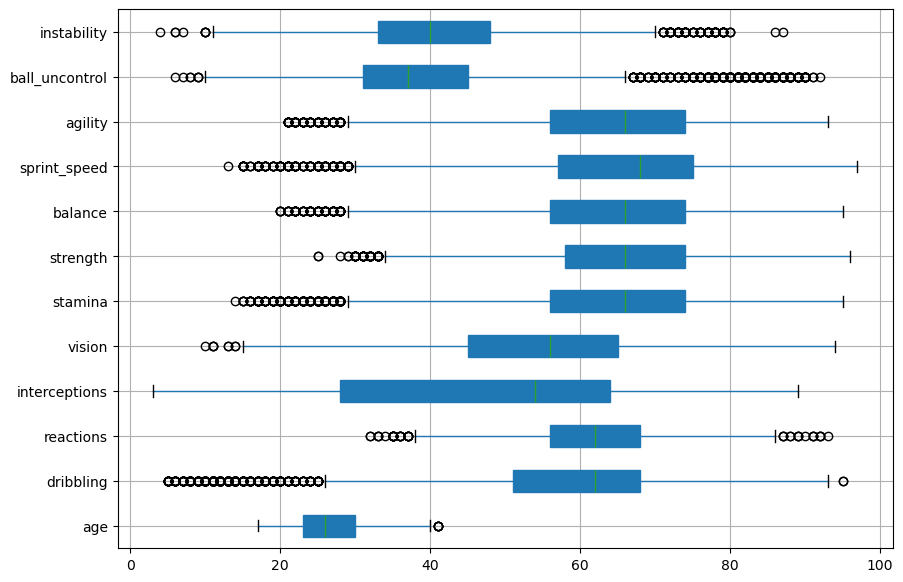

In [6]:
df = pd.DataFrame(data)
plt.figure(figsize=(10, 7))
df.boxplot(["age", "dribbling", "reactions", "interceptions", "vision", "stamina", "strength", "balance", "sprint_speed", "agility", "ball_uncontrol", "instability"], patch_artist=True, vert= False)
plt.show()

### Kraje z których pochodzą piłkarze

Histogram z krajami z których pochodzą piłkarze z naszej bazy danych pokazuje, że najwięcej z nich jest kolejno z Anglii, Niemiec oraz Hiszpanii.

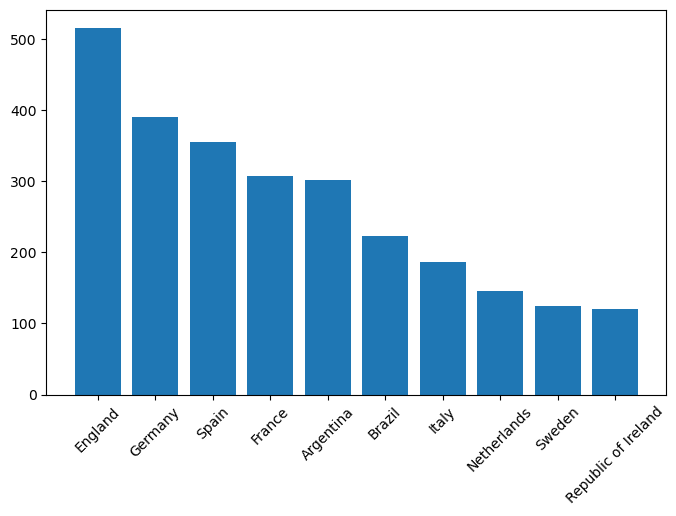

In [7]:
df = pd.DataFrame(data)
country_counts = df['country'].value_counts()
top_10_countries = country_counts.head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_10_countries.index, top_10_countries)
plt.xticks(rotation=45)
plt.show()

## Usuwanie duplikatów

In [8]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 3


W naszej bazie danych znaleźliśmy 3 duplikaty, które należy usunąć. Skorzystamy w tym celu z funkcji *drop_duplicates*, która nam to umożliwi.

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 0


Po wykonaniu odpowiedniego polecenia, usunięto zduplikowane dane.

## Metoda PCA

## Standaryzacja danych do użycia w analizie składowych głównych (PCA)

In [11]:
data_with_numbers = data.drop(['player', 'country', 'club', 'age', 'height'], axis=1)
scaler = StandardScaler()
df = scaler.fit_transform(data_with_numbers)
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

## Interpretacja wyników: które cechy mają największy wpływ na róznice między piłkarzami
Wykorzystywana jest analiza współczynników ładunku głównych składowych PC. Wartości te określają jak bardzo każda cecha przyczynia się do każdej głównej składowej.
- Wartości bliskie zeru wskazują na to, że dana cecha ma mały wpływ na dany komponent główny.
- Dodatnie wartości wskazują na pozytywną korelację między daną cechą a danym komponentem głównym, podczas gdy ujemne wartości wskazują na negatywną korelację.
- Im większa wartość bezwzględna, tym większy wpływ ma dana cecha na dany komponent główny.

In [12]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=data_with_numbers.columns)
print(loadings_df)

   dribbling  reactions  interceptions    vision   stamina  strength  \
0  -0.374920  -0.231818      -0.204296 -0.311189 -0.332336 -0.044966   
1   0.103497  -0.359459      -0.307785  0.032472 -0.139749 -0.601420   
2   0.006987   0.462500      -0.506141  0.469580 -0.358284 -0.158777   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0 -0.299182     -0.307938 -0.332522        0.377914     0.327541   
1  0.353718      0.206164  0.299723        0.000454     0.214726   
2 -0.089330     -0.253765 -0.024144        0.018259    -0.287147   

   age_destimulant  
0         0.098196  
1         0.281948  
2         0.006155  


## Wnioski
- pierwsza główna składowa (indeks 0): największy wpływ na tę składową mają zmienne <b>dribbling, vision, stamina, balance, sprint_speed, agility</b>. Wszystkie te zmienne mają ujemne ładunki, co oznacza, że im wyższa jest wartość tych zmiennych, tym niższa jest wartość tej głównej składowej. Zmienne <b>ball_uncontrol i instability</b> mają dodatni ładunek, co oznacza, że im wyższa jest wartość tych zmiennych, tym wyższa jest wartość tej głównej składowej.
- druga główna składowa (indeks 1) : zmienne ujemne o największym wpływie: <b>reactions, interceptions, strength</b> zmienne dodatnie: <b>balance, agility</b>
- trzecia główna składowa (indeks 2): ujemne zmienne: <b>interceptions, stamina</b> dodatnie zmienne: <b>reactions, vision</b>
### Cechy takie jak reactions, interceptions, instability najbardziej wpływają na różnice między piłkarzami.

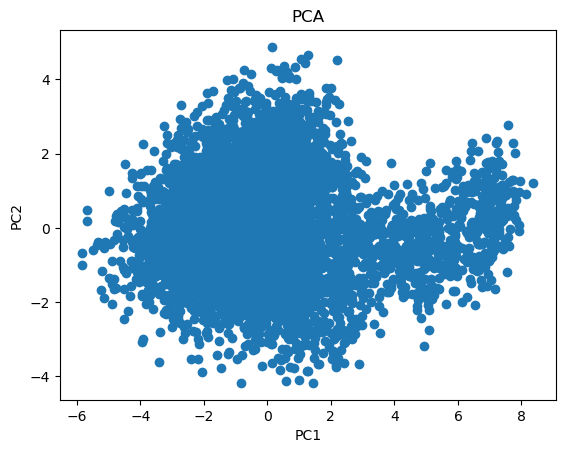

In [13]:
pca_data = pca.transform(df)
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

# Metoda TOPSIS

Metoda TOPSIS (ang. Technique for Order Preference by Similarity to Ideal Solution) jest wielokryterialną metodą analizy decyzyjnej, służącą do porządkowania i wyboru wariantów decyzyjnych w oparciu o zestaw kryteriów.

Na początek wyznaczamy znormalizowaną macierz decyzyjną: $R = (r_{ij}) $

$$ r_{ij} = \frac{x_{ij}}{\sqrt{\sum_{k=1}^m x_{kj}^2}} $$

In [14]:
df = pd.DataFrame(data.drop(['player', 'country', 'club', 'age', 'height'], axis=1))
col_sq_sum = np.sqrt((df ** 2).sum())
topsis_normalised_matrix = df.divide(col_sq_sum)
print(topsis_normalised_matrix.head(5))

   dribbling  reactions  interceptions    vision   stamina  strength  \
0   0.009644   0.014421       0.016713  0.007090  0.011164  0.017143   
1   0.015699   0.014846       0.017999  0.015126  0.017659  0.016146   
2   0.002691   0.013785       0.005143  0.011581  0.007713  0.013555   
3   0.010765   0.013573       0.016971  0.006854  0.014817  0.016345   
4   0.001794   0.010604       0.003086  0.008981  0.005683  0.012757   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0  0.008082      0.010349  0.008715        0.013480     0.015398   
1  0.008486      0.013334  0.013175        0.009286     0.014166   
2  0.008284      0.009553  0.007297        0.022466     0.016013   
3  0.011314      0.012538  0.011553        0.016176     0.009239   
4  0.004849      0.006170  0.006891        0.025762     0.020325   

   age_destimulant  
0         0.015858  
1         0.007929  
2         0.002643  
3         0.013215  
4         0.013215  


### Liczenie wag

In [15]:
preferences = {
    'dribbling': 5,
    'reactions': 5,
    'interceptions': 2,
    'vision': 5,
    'stamina': 4,
    'strength': 4,
    'balance': 5,
    'sprint_speed': 4,
    'agility': 5,
    'ball_uncontrol': 5,
    'instability': 2,
    'age_destimulant': 2,
}

total_preference = sum(preferences.values())
normalized_preferences = {feature: weight/total_preference for feature, weight in preferences.items()}

normalised_weights = pd.DataFrame(normalized_preferences, index=[0])

print("Znormalizowane wagi:")
print(normalised_weights)

Znormalizowane wagi:
   dribbling  reactions  interceptions    vision   stamina  strength  \
0   0.104167   0.104167       0.041667  0.104167  0.083333  0.083333   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0  0.104167      0.083333  0.104167        0.104167     0.041667   

   age_destimulant  
0         0.041667  


In [16]:
preferences = {
    'dribbling': 5,
    'reactions': 5,
    'interceptions': 2,
    'vision': 5,
    'stamina': 4,
    'strength': 4,
    'balance': 5,
    'sprint_speed': 4,
    'agility': 5,
    'ball_uncontrol': 5,
    'instability': 2,
    'age_destimulant': 2,
}

total_preference = sum(preferences.values())
normalized_preferences = {feature: weight/total_preference for feature, weight in preferences.items()}

#weights = np.array(list(normalized_preferences.values()))
normalised_weights = pd.DataFrame(normalized_preferences, index=[0])

print("Znormalizowane wagi:")
print(normalised_weights)

Znormalizowane wagi:
   dribbling  reactions  interceptions    vision   stamina  strength  \
0   0.104167   0.104167       0.041667  0.104167  0.083333  0.083333   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0  0.104167      0.083333  0.104167        0.104167     0.041667   

   age_destimulant  
0         0.041667  


Następnie wyznaczamy ważoną znormalizowaną macierz decyzyjną $ V = (v_{ij}) $

$$ v_{ij} = r_{ij} \cdot w_j $$

In [17]:
df_result = topsis_normalised_matrix.mul(normalised_weights['dribbling'][0], axis=0)

for column in topsis_normalised_matrix.columns:
    df_result[column] = topsis_normalised_matrix[column] * normalised_weights[column][0]

print(df_result.head(4))

   dribbling  reactions  interceptions    vision   stamina  strength  \
0   0.001005   0.001502       0.000696  0.000739  0.000930  0.001429   
1   0.001635   0.001546       0.000750  0.001576  0.001472  0.001345   
2   0.000280   0.001436       0.000214  0.001206  0.000643  0.001130   
3   0.001121   0.001414       0.000707  0.000714  0.001235  0.001362   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0  0.000842      0.000862  0.000908        0.001404     0.000642   
1  0.000884      0.001111  0.001372        0.000967     0.000590   
2  0.000863      0.000796  0.000760        0.002340     0.000667   
3  0.001179      0.001045  0.001203        0.001685     0.000385   

   age_destimulant  
0         0.000661  
1         0.000330  
2         0.000110  
3         0.000551  


Wyznaczamy idealne $A^+ $ i nieidealne $A^-$ rozwiązanie

$$ A^+ = (v_1^+,v_2^+,\ldots,v_n^+) = \{(\max_i v_{ij}~|~j\in B)\}, \{(\min_i v_{ij}~|~j\in C)\} $$ $$
A^- = (v_1^-,v_2^-,\ldots,v_n^-) = \{(\min_i v_{ij}~|~j\in B)\}, \{(\max_i v_{ij}~|~j\in C)\}
$$

In [18]:
ideal_solution = np.max(df_result, axis=0)
ideal_solution['ball_uncontrol'] = np.min(df_result['ball_uncontrol'])
ideal_solution['instability'] = np.min(df_result['instability'])
ideal_solution['age_destimulant'] = np.min(df_result['age_destimulant'])

non_ideal_solution = np.min(df_result, axis=0)
non_ideal_solution['ball_uncontrol'] = np.max(df_result['ball_uncontrol'])
non_ideal_solution['instability'] = np.max(df_result['instability'])
non_ideal_solution['age_destimulant'] = np.max(df_result['age_destimulant'])

Obliczamy odległości od idealnego oraz nieidealnego rozwiązania

odległości każdego wariantu decyzyjnego $A_i$ od rozwiązania
idealnego$A^+$ $$
d_i^+ = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^+)^2} $$oraz antyidealnego $A^-$  $$
d_i^- = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^-)^2}
$$

In [19]:
distance_to_ideal = np.sqrt(np.sum((df_result - ideal_solution) ** 2, axis=1))
distance_to_non_ideal = np.sqrt(np.sum((df_result - non_ideal_solution) ** 2, axis=1))

Obliczenie wyniku TOPSIS

Wyznaczenie współczynnika względnej bliskości wariantów decyzyjnych$A_i$ 
do rozwiązania idealnego $A^+$
$$
RC_i = \frac{d_i^-}{d_i^++d_i^-}
$$

Ranking wariantów decyzyjnych względem wartości współczynnika
względnej bliskości wariantów decyzyjnych do rozwiązania idealnego –$~RC_i$. Im
wyższa wartość tego współczynnika tym lepszy wariant decyzyjny. Najlepszym wariantem jest ten z najwyższą wartości$~RC_i$. 

In [20]:
topsis_score = distance_to_non_ideal / (distance_to_ideal + distance_to_non_ideal)

### Prezentowanie danych

In [21]:
data['TOPSIS Score'] = topsis_score
sorted_data = data.sort_values(by='TOPSIS Score', ascending=False)
selected_columns = sorted_data[['player', 'TOPSIS Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'TOPSIS Score': 'Wynik metodą TOPSIS'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą TOPSIS
0,1,Mohamed Salah,0.870836
1,2,Kylian Mbappé,0.850951
2,3,Ángel Correa,0.850286
3,4,Lautaro Martínez,0.848274
4,5,Renato Sanches,0.846653
5,6,Sergi Darder,0.843841
6,7,João Cancelo,0.842876
7,8,Sadio Mané,0.842718
8,9,Kevin De Bruyne,0.839945
9,10,Joshua Kimmich,0.835453


## Wnioski
- **Najlepsi:**  Mohamed Salah, Kylian Mbappé, Ángel Correa
- **Najgorsi:** Harry Griffiths, Emmanuel Ochoa, Maciej Kowal<br>

Wnioski do napisania
## Wykresy

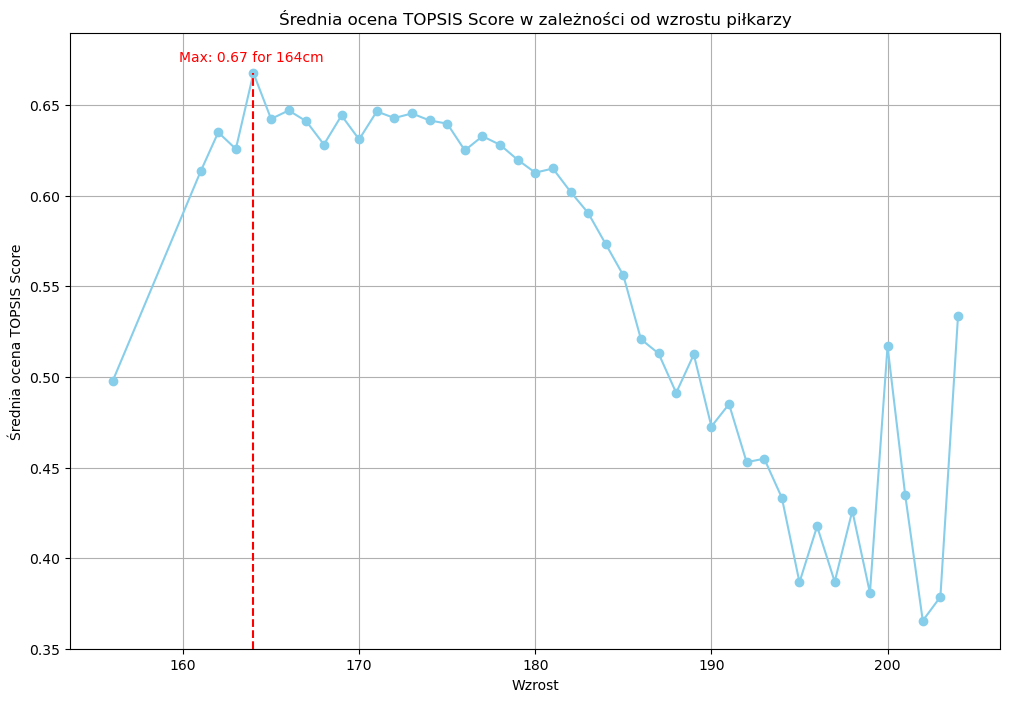

In [22]:
average_scores_by_height = sorted_data.groupby('height')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=0.35, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.005, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wzrostu piłkarzy')
plt.ylim(0.35, 0.69)
plt.grid(True)
plt.show()



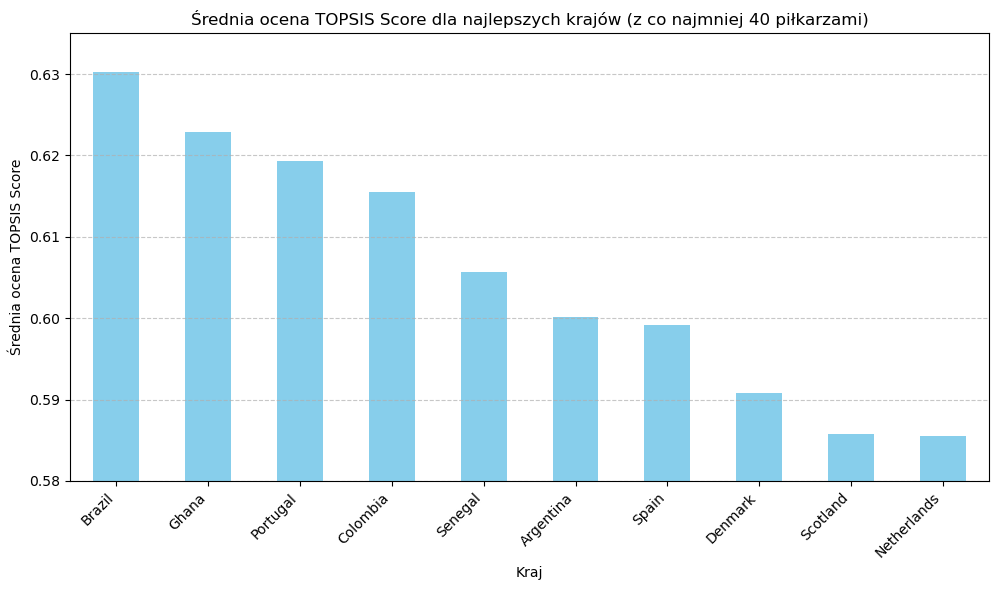

In [23]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['TOPSIS Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.58, 0.635)

plt.show()

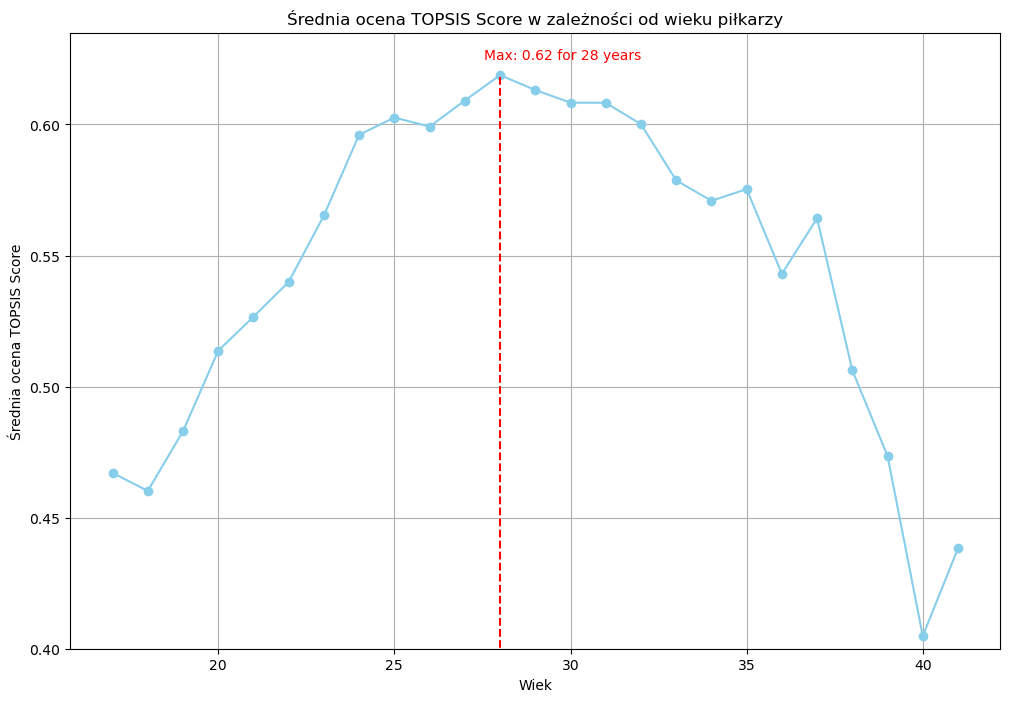

In [24]:
#tutaj nie mam pojęcia czemu wykres wychodzi na odwrót, age_destimulant to odleglosc od idealnego wieku (28) i jest oznaczona jako impact '-' czyli im mniej tym lepiej
#ale i tak ten wykres ma być do wywalenia 
average_scores_by_age = sorted_data.groupby('age')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=0.35, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+4, max_score+0.005, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.4, 0.635)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda SSW

**Metoda statystyczna SSW**, czyli *Suma kwadratów odchyleń wewnątrzgrupowych*, jest miarą zmienności w obrębie poszczególnych grup w zbiorze danych. SSW jest wykorzystywana w analizie wariancji (ANOVA) do oceny, czy istnieją statystycznie istotne różnice między średnimi wartościami różnych grup.

$$
SSW = \sum_{i}^n\sum_{j}^m(x_i-x_j)^2
$$
$x_i$ - wartość i-tej obserwacji w j-tej grupie <br>
$x_j$ - średnia arytmetyczna j-tej grupy

**Interpretacja**:<br>
- *Mała wartość SSW*: Oznacza to, że dane w obrębie grup są homogeniczne, czyli mało zróżnicowane. Innymi słowy, obserwacje w danej grupie są zbliżone do siebie pod względem wartości cechy, którą badamy.
- *Duża wartość SSW*\: Oznacza to, że dane w obrębie grup są heterogeniczne, czyli zróżnicowane. Innymi słowy, obserwacje w danej grupie różnią się między sobą pod względem wartości cechy, którą badamy.

In [25]:
SSW = []
for i in range(len(data_with_numbers)):
    ssw = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i] -  values.loc[0, column_name]) / values.loc[1, column_name]
            else:
                Zij = (data_with_numbers[column_name].iloc[i] -  values.loc[0, column_name]) / values.loc[1, column_name]
            ssw += Zij
    SSW.append(ssw)
data['SSW Score'] = SSW

### Prezentowanie wyników

In [26]:
sorted_data = data.sort_values(by='SSW Score', ascending=False)
selected_columns = sorted_data[['player', 'SSW Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'SSW Score': 'Wynik metodą SSW'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą SSW
0,1,Mohamed Salah,19.776473
1,2,Kylian Mbappé,19.125035
2,3,Joshua Kimmich,18.242400
3,4,Renato Sanches,17.827494
4,5,Lautaro Martínez,17.745215
5,6,Marco Verratti,17.707281
6,7,João Cancelo,17.622084
7,8,Kevin De Bruyne,17.615075
8,9,Sadio Mané,17.608877
9,10,Federico Valverde,17.490339


## Wnioski
- **Najlepsi:**  Pedri, Mohamed Salah, Federico Valverde
- **Najgorsi:** Alexandru Utiu, Ghjuvanni Quilichini, Paul Tschernuth

Ranking wykorzystujący metodę SSW jest lepszy od metody TOPSIS.

Jest to metoda z dużą wrażliwością na wartości odstające, których w naszych danych jest sporo. Metoda SSW nie uwzględnia wag zmiennych. Oznacza to, że wszystkie zmienne są traktowane jako równie ważne, co nie zawsze jest zgodne z rzeczywistością.<br>Nieprawdą byłoby stwierdzenie, że umiejętność przeglądu pola (vision) ma taką samą wagę jak prędkość piłkarza podczas sprintów (sprint_speed).
## Wykresy

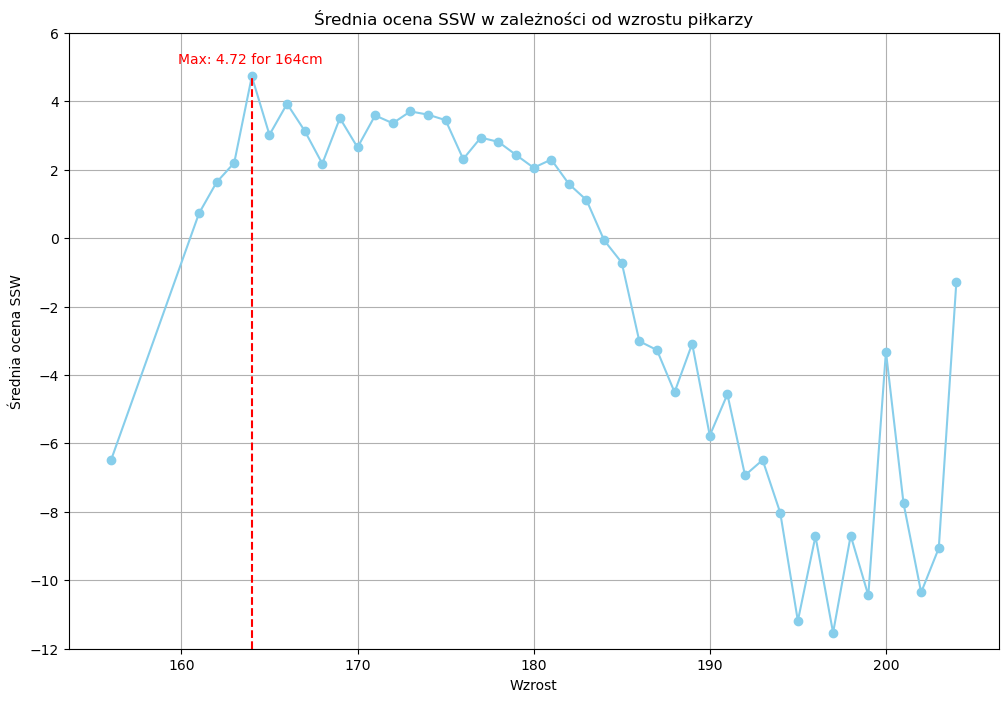

In [27]:
average_scores_by_height = sorted_data.groupby('height')['SSW Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.3, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wzrostu piłkarzy')
plt.ylim(-12, 6)
plt.grid(True)
plt.show()

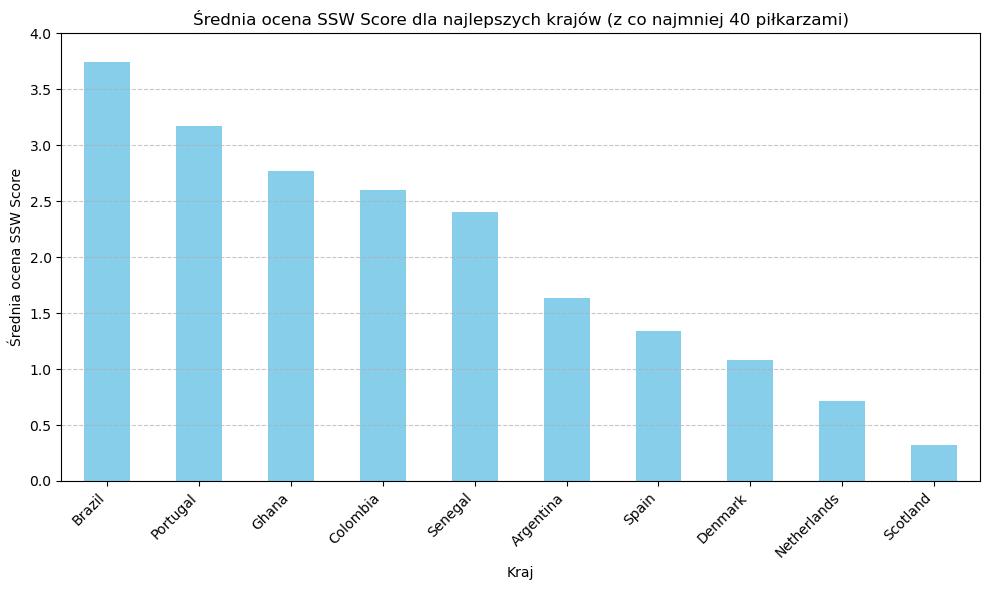

In [28]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['SSW Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena SSW Score')
plt.title('Średnia ocena SSW Score dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0, 4)

plt.show()

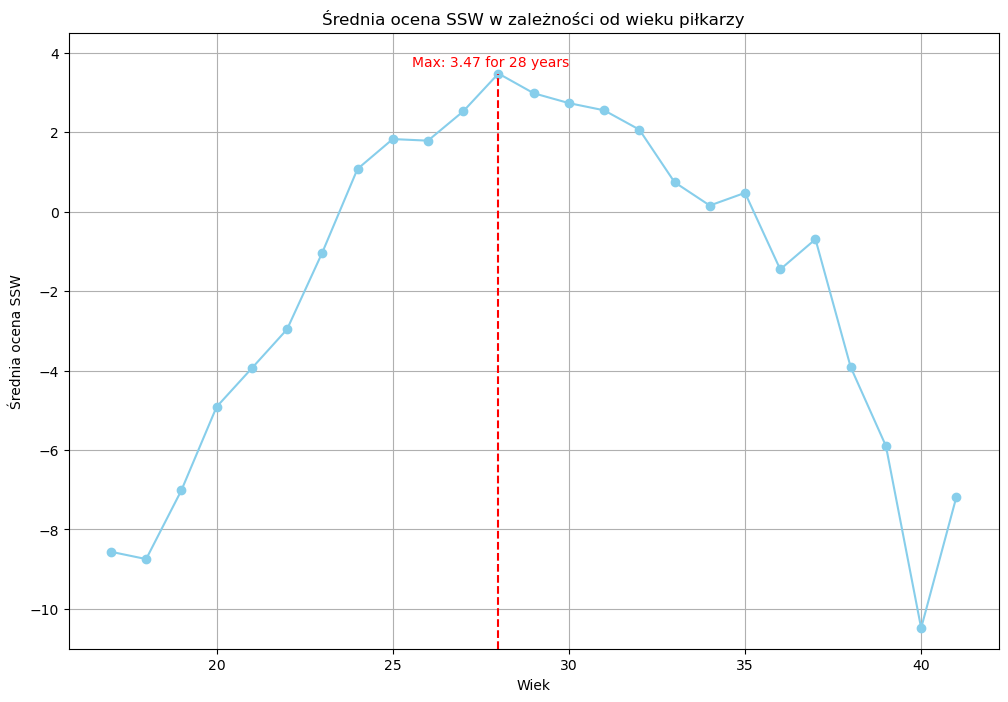

In [29]:
average_scores_by_age = data.groupby('age')['SSW Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.1, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(-11, 4.5)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda Hellwiga

Metoda porządkowania liniowego Hellwiga jest metodą wzorcową, zaproponowaną przez Jörga Hellwiga w 1968r., w której punktem odniesienia obiektów w przestrzeni wielowymiarowej jest wzorzec.

### 1. Normalizacja zmiennych <br>
$$
z_{ij}=\frac{x_{ij}-\bar x_j}{s_j}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\bar {x_j}$ - średnia arytmetyczna obserwacji j-tej zmiennej obiektu <br>
$s_j$

In [30]:
df = pd.DataFrame(data.drop(['player', 'country', 'club', 'age', 'height', 'TOPSIS Score', 'SSW Score'], axis=1))
col_mean = df.sum()/df.count()
col_std = df.std()

hellwig_standardized_matrix = (df.subtract(col_mean)).divide(col_std)
#print(hellwig_standardized_matrix.head(5))

### 2. Współrzędne wzorca

$$z_{0j}=\left\{\begin{array}{lc}
\max_i\{z_{ij}\}&\mbox{ - dla zmiennych stymulant}\\
\min_i\{z_{ij}\}&\mbox{ - dla zmiennych destymulant}
\end{array} \right.$$

In [31]:
ideal_solution = np.max(hellwig_standardized_matrix, axis=0)
ideal_solution['ball_uncontrol'] = np.min(hellwig_standardized_matrix['ball_uncontrol'])
ideal_solution['instability'] = np.min(hellwig_standardized_matrix['instability'])
ideal_solution['age_destimulant'] = np.min(hellwig_standardized_matrix['age_destimulant'])
#print(ideal_solution)

### 3. Odległość obiektów od wzorca

$$
d_{i0} = \sqrt{\sum_{j=1}^m\left (z_{ij}-z_{0j}\right )^2}
$$

In [32]:
distance = np.sqrt(np.sum((hellwig_standardized_matrix - ideal_solution) ** 2, axis=1))
#print(distance)

### 4. Wartość zmiennej agregowanej

$$
q_i = 1-\frac{d_{i0}}{d_0}
$$<br>
$$d_0 = \bar{d_0} + 2s_d$$
$$\bar{d_0} = \frac{1}{n} \sum_{i=1}^n d_{i0}$$
$$s_d = \sqrt{\sum_{i=1}^n (d_{i0}-\bar{d_0})^2}$$

In [33]:
d_zero_bar = np.sum(distance)/distance.count()
s_d = np.sqrt(np.sum((distance - d_zero_bar) ** 2))
d_zero = d_zero_bar + (2*s_d)

hellwig_results = 1 - distance.divide(d_zero)
data['Hellwig Score'] = hellwig_results

### Prezentowanie wyników

In [34]:
sorted_data = data.sort_values(by='Hellwig Score', ascending=False)
selected_columns = sorted_data[['player', 'Hellwig Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'Hellwig Score': 'Wynik metodą Hellwiga'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Hellwiga
0,1,Mohamed Salah,0.992007
1,2,Renato Sanches,0.991487
2,3,Lautaro Martínez,0.990775
3,4,Sergi Darder,0.990731
4,5,Federico Valverde,0.990730
5,6,Emre Can,0.990297
6,7,Franck Yannick Kessié,0.990280
7,8,Kevin De Bruyne,0.990128
8,9,Canales,0.989954
9,10,Kylian Mbappé,0.989938


## Wykresy

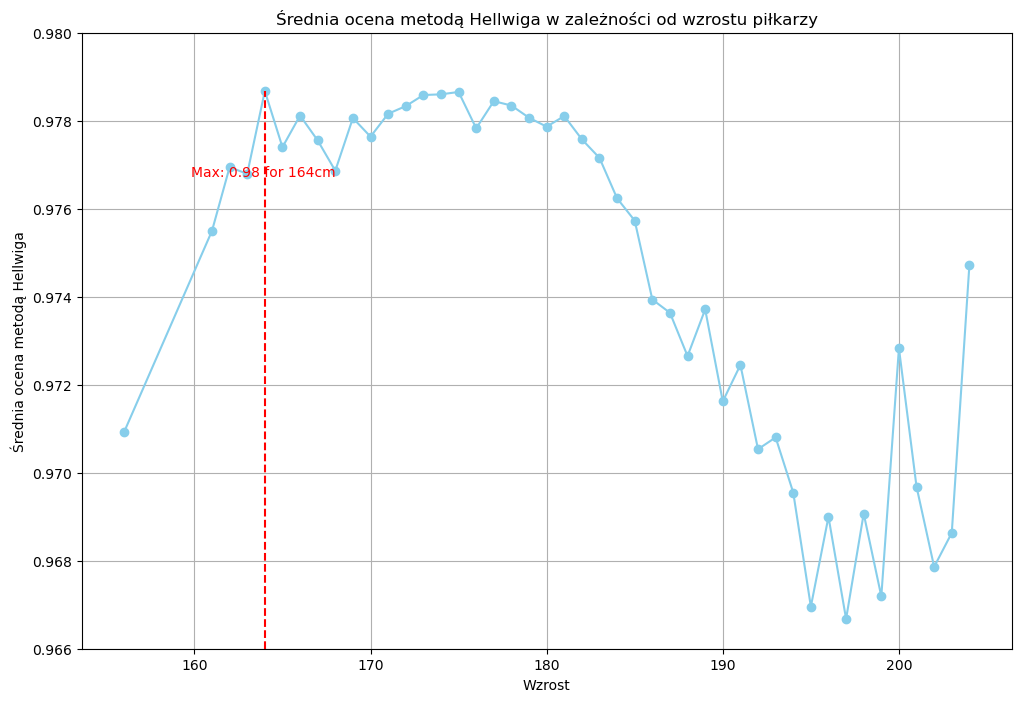

In [35]:
average_scores_by_height = sorted_data.groupby('height')['Hellwig Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga w zależności od wzrostu piłkarzy')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=0.966, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score-0.002, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.ylim(0.966, 0.98)
plt.grid(True)
plt.show()

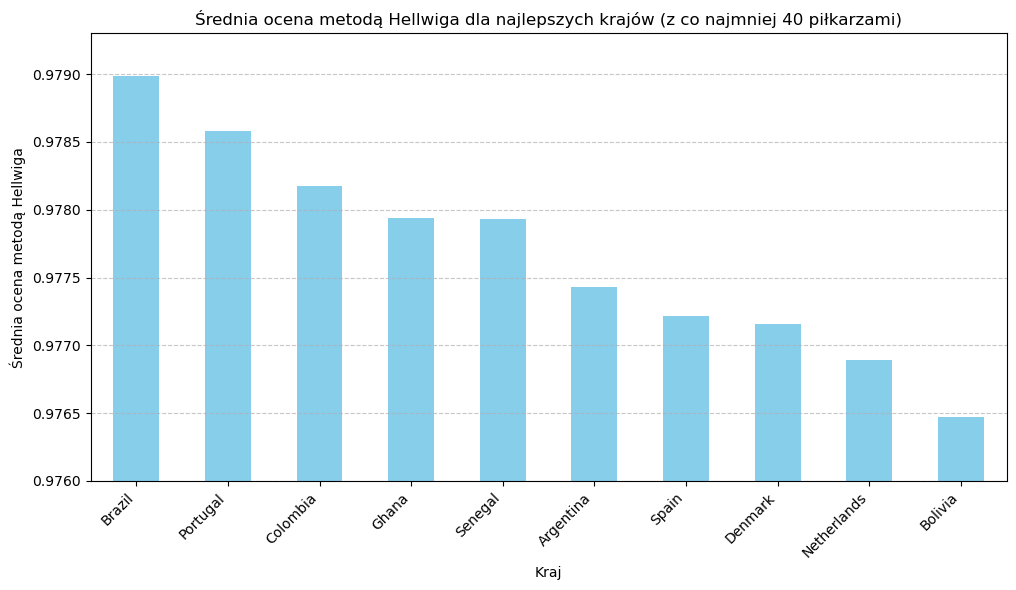

In [36]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['Hellwig Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.976, 0.9793)

plt.show()

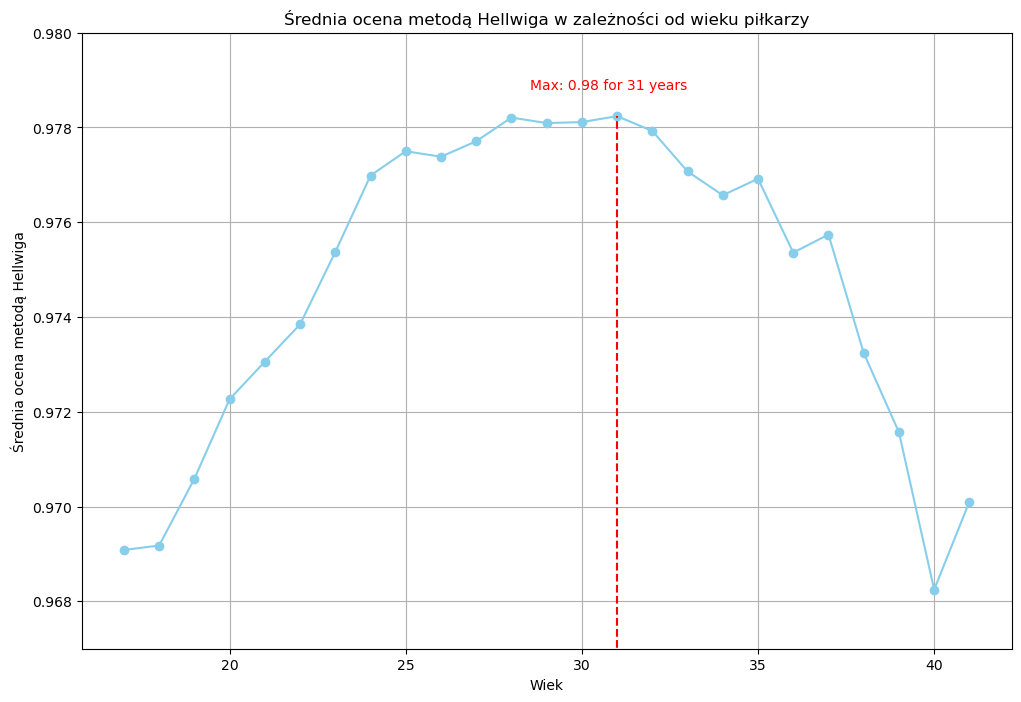

In [37]:
average_scores_by_age = data.groupby('age')['Hellwig Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.0005, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(0.967, 0.98)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Hellwiga')
plt.title('Średnia ocena metodą Hellwiga w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

## Metoda Strahl'a

### 1. Wzory

$$
z_{ij}=\frac{x_{ij}}{\max_{i} x_{ij}}
$$
$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\max_{i} x_{ij}$ - maksymalna wartość j-tej cechy statystycznej <br>
$Q_{i}$ - wartość cechy syntetycznej dla i-tego obiektu

### 2. Obliczenia

In [38]:
STRAHL = []
for i in range(len(data_with_numbers)):
    strahl = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i]) / values.loc[7, column_name]
            else:
                Zij = data_with_numbers[column_name].iloc[i] / values.loc[7, column_name]
            strahl += Zij
            
    STRAHL.append(strahl)
data['STRAHL Score'] = STRAHL

### 3. Prezentowanie wyników

In [39]:
sorted_data = data.sort_values(by='STRAHL Score', ascending=False)
selected_columns = sorted_data[['player', 'STRAHL Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'STRAHL Score': 'Wynik metodą Strahl\'a'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Strahl'a
0,1,Mohamed Salah,7.469138
1,2,Joshua Kimmich,7.437049
2,3,Marco Verratti,7.351968
3,4,João Cancelo,7.351042
4,5,Renato Sanches,7.316526
5,6,Kylian Mbappé,7.305531
6,7,Sergi Darder,7.271576
7,8,Federico Valverde,7.232564
8,9,Ángel Correa,7.210888
9,10,Franck Yannick Kessié,7.185112


### 4. Wyświetlanie wykresów

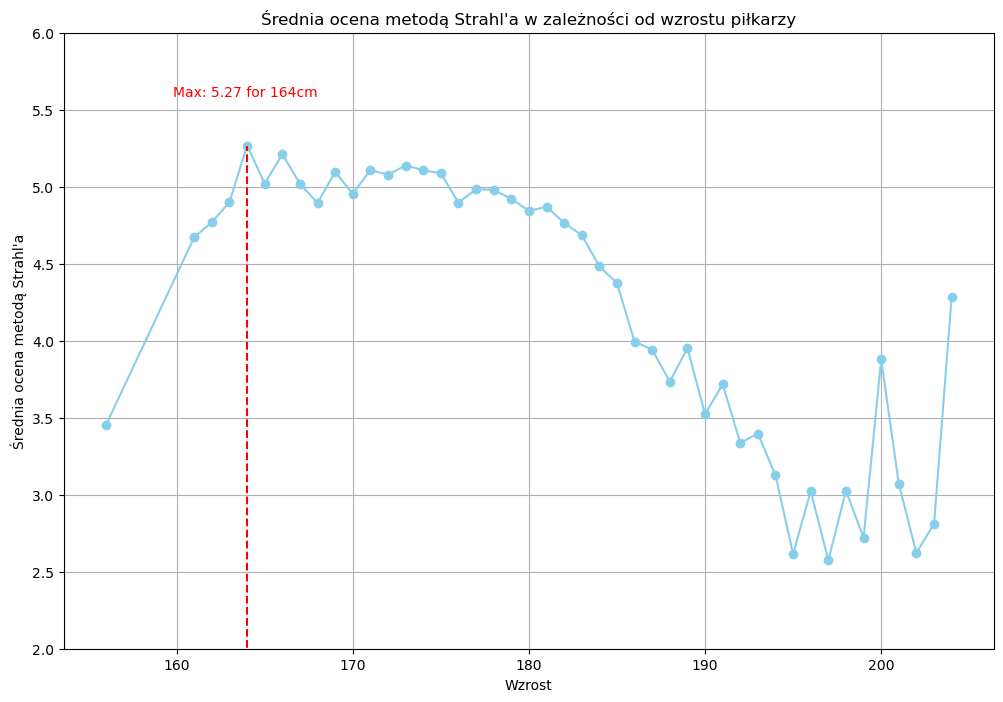

In [40]:
average_scores_by_height = sorted_data.groupby('height')['STRAHL Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.3, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a w zależności od wzrostu piłkarzy')
plt.ylim(2, 6)
plt.grid(True)
plt.show()

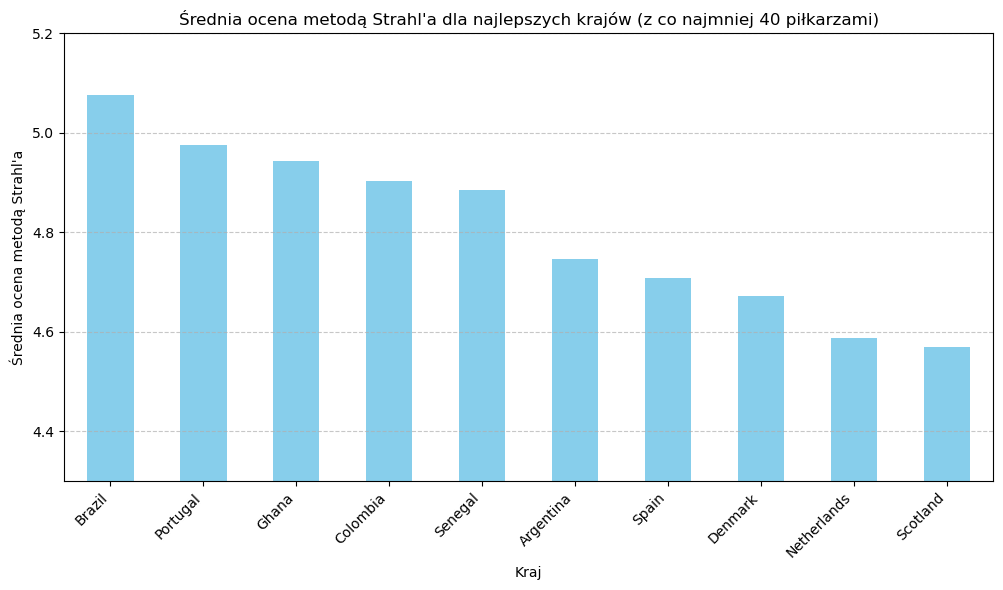

In [41]:
players_count_by_country = sorted_data['country'].value_counts()
top_countries = players_count_by_country[players_count_by_country >= 40].index
average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['STRAHL Score'].mean()
top_countries = average_scores_by_country.nlargest(10).index
top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(4.3, 5.2)

plt.show()

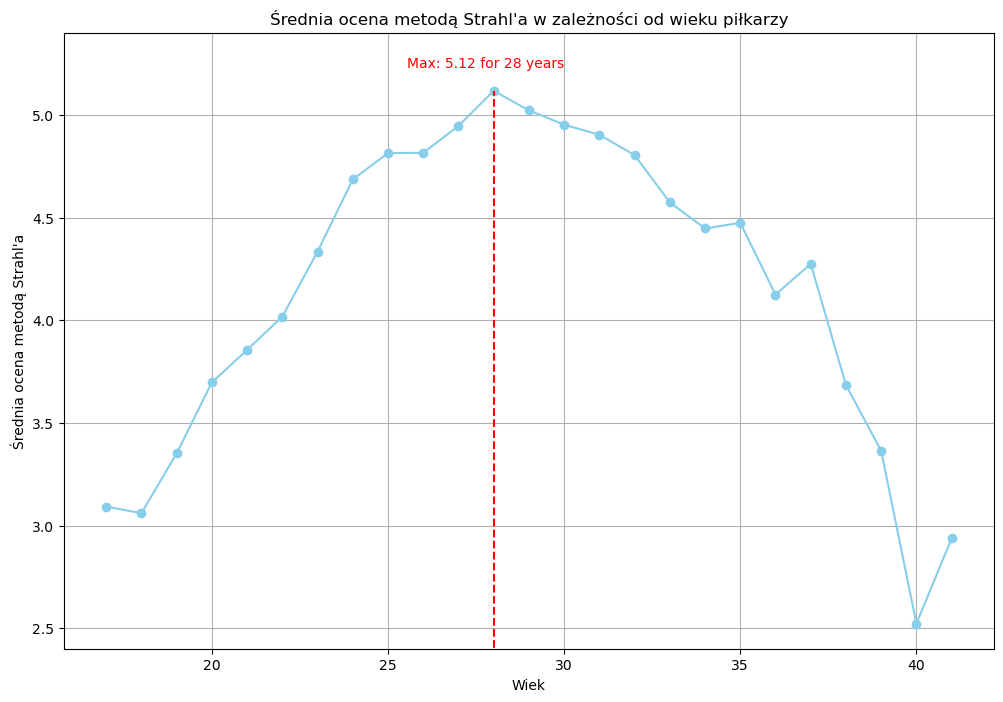

In [42]:
average_scores_by_age = data.groupby('age')['STRAHL Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.1, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(2.4, 5.4)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Strahl\'a')
plt.title('Średnia ocena metodą Strahl\'a w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

## Metoda Muz'a

### 1. Wzory

$$
z_{ij}=\frac{x_{ij}-\min_{i} x_{ij}}{\max_{i} x_{ij}-\min_{i} x_{ij}}
$$
$$
Q_{i} = \frac{1}{m} \sum_{j=1}^{m} z_{ij}
$$
$x_{ij}$ - obserwacja j-tej zmiennej obiektu <br>
$\min_{i} x_{ij}$ - minimalna wartość j-tej cechy statystycznej <br>
$\max_{i} x_{ij}$ - maksymalna wartość j-tej cechy statystycznej <br>
$Q_{i}$ - wartość cechy syntetycznej dla i-tego obiektu

### 2. Obliczenia

In [43]:
MUZ = []
for i in range(len(data_with_numbers)):
    muz = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i] - values.loc[6, column_name]) / (values.loc[7, column_name]-values.loc[6, column_name])
            else:
                Zij = (data_with_numbers[column_name].iloc[i] - values.loc[6, column_name]) / (values.loc[7, column_name]-values.loc[6, column_name])
            muz += Zij
            
    MUZ.append(muz)
data['MUZ Score'] = MUZ

### 3. Prezentowanie wyników

In [44]:
sorted_data = data.sort_values(by='MUZ Score', ascending=False)
selected_columns = sorted_data[['player', 'MUZ Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'MUZ Score': 'Wynik metodą Muz\'a'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Muz'a
0,1,Mohamed Salah,7.410768
1,2,Joshua Kimmich,7.263898
2,3,Kylian Mbappé,7.247718
3,4,Renato Sanches,7.174995
4,5,Marco Verratti,7.140708
5,6,João Cancelo,7.134576
6,7,Federico Valverde,7.064936
7,8,Sergi Darder,7.063378
8,9,Ángel Correa,7.049728
9,10,Lautaro Martínez,7.032756


### 4. Wyświetlanie wykresów

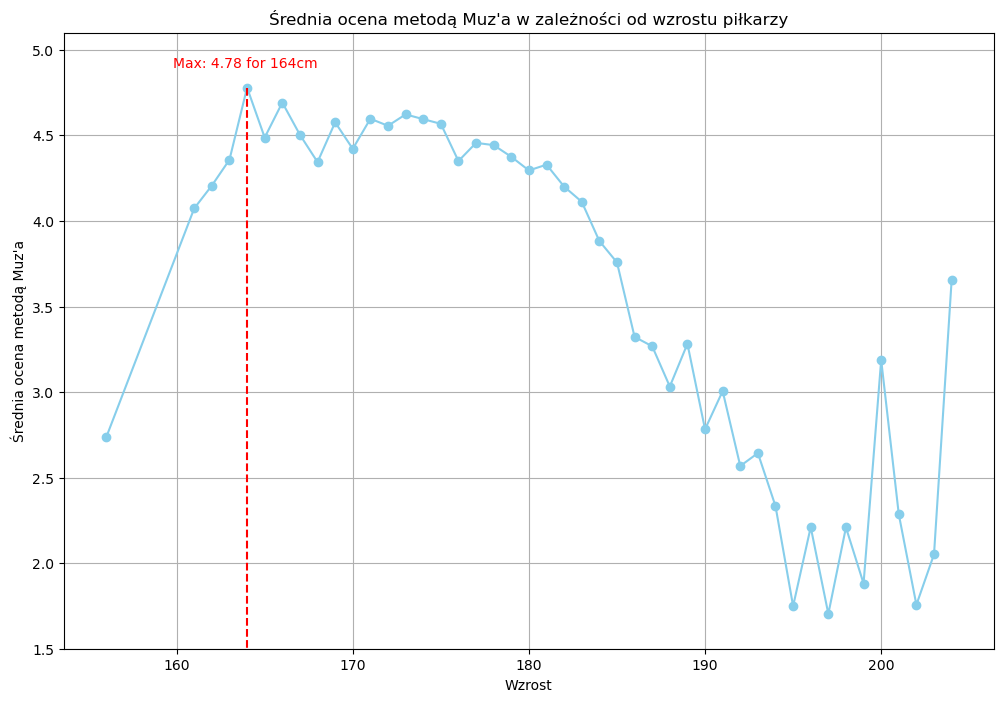

In [45]:
average_scores_by_height = sorted_data.groupby('height')['MUZ Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.1, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a w zależności od wzrostu piłkarzy')
plt.ylim(1.5, 5.1)
plt.grid(True)
plt.show()

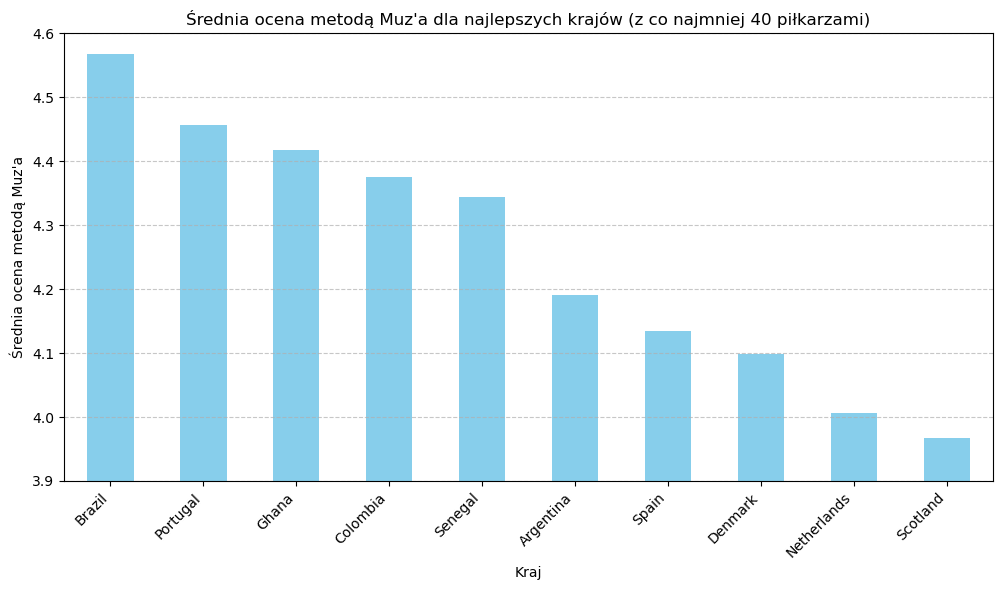

In [46]:
players_count_by_country = sorted_data['country'].value_counts()
top_countries = players_count_by_country[players_count_by_country >= 40].index
average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['MUZ Score'].mean()
top_countries = average_scores_by_country.nlargest(10).index
top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(3.9, 4.6)

plt.show()

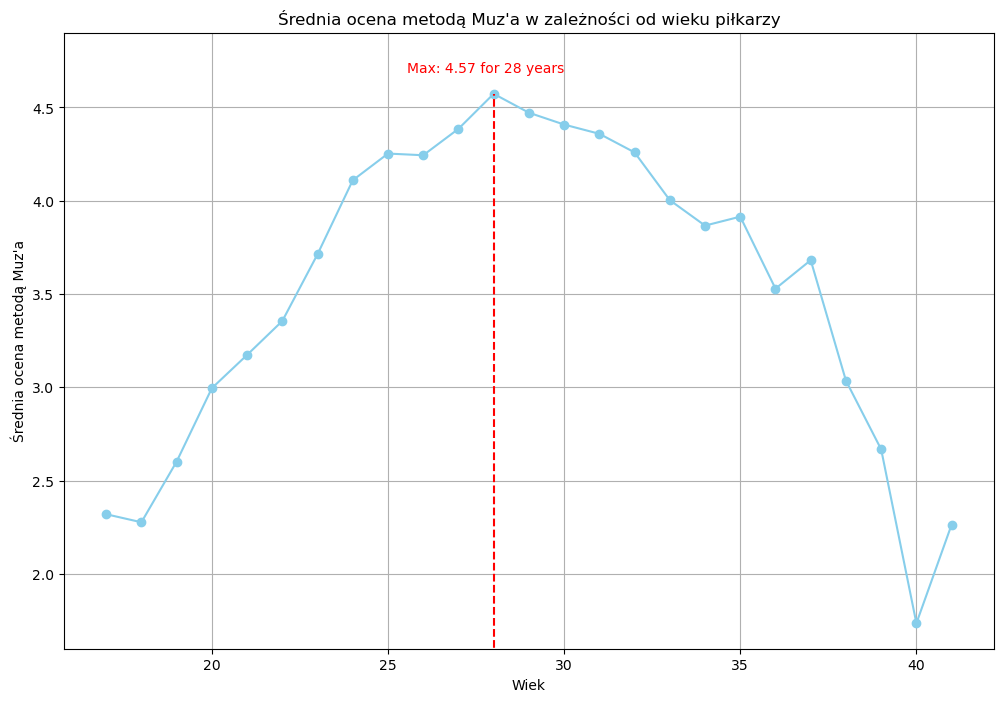

In [47]:
average_scores_by_age = data.groupby('age')['MUZ Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_age.max()
max_age = average_scores_by_age.idxmax()
plt.vlines(x=max_age, ymin=-11, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_age+2, max_score+0.1, f'Max: {max_score:.2f} for {max_age:.0f} years', va='bottom', ha='right', color='r')
plt.ylim(1.6, 4.9)
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena metodą Muz\'a')
plt.title('Średnia ocena metodą Muz\'a w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda Nowaka


**Metoda statystyczna Nowaka**, nazywana także analizą czestotliwości występowania kombinacji, jest techniką używaną do identyfikacji wzorców w danych. Polega na analizie częstości występowania różnych kombinacji zmiennych w zbiorze danych w celu wykrycia istotnych zależności między nimi. Jest szczególnie przydatna w badaniach społecznych i marketingowych do odkrywania ukrytych wzorców zachowań konsumentów czy struktur społecznych.

$$
Q_{i} = \sum_{j=1}^mz_{ij}
$$
$$
z_{ij} = \frac{x_{ij}}{\bar{x}_{j}}
$$


$\bar{x}_j$ - średnia arytmetyczna j-tej grupy <br>
$z_{ij}$ - unormowana j-tej cechy dla i-tego obiektu <br>
$Q_i$ - wartość cechy syntetycznej dla i-tego obiektu

In [48]:
nowaklist = []
for i in range(len(data_with_numbers)):
    Qi = 0
    for column_name in values.columns:
        if column_name != ' ':
            if column_name == 'ball_uncontrol' or column_name == 'instability' or column_name == 'age_destimulant':
                Zij = -(data_with_numbers[column_name].iloc[i]) / values.loc[0, column_name]
            else:
                Zij = (data_with_numbers[column_name].iloc[i]) / values.loc[0, column_name]
            Qi += Zij
            
    nowaklist.append(Qi)

In [49]:
data['Nowak Score'] = nowaklist

### Prezentowanie wyników

In [50]:
sorted_data = data.sort_values(by='Nowak Score', ascending=False)
selected_columns = sorted_data[['player', 'Nowak Score']].head(10)
selected_columns = selected_columns.rename(columns={'player': 'Imię i nazwisko piłkarza', 'Nowak Score': 'Wynik metodą Nowaka'})
selected_columns.reset_index(drop=True, inplace=True)
selected_columns.insert(0, 'Miejsce', selected_columns.index + 1)
selected_columns

,Miejsce,Imię i nazwisko piłkarza,Wynik metodą Nowaka
0,1,Joshua Kimmich,11.584408
1,2,Marco Verratti,11.366478
2,3,João Cancelo,11.335149
3,4,Mohamed Salah,11.186472
4,5,Sergi Darder,11.169203
5,6,Ángel Correa,11.060430
6,7,Renato Sanches,11.051196
7,8,Bruno Fernandes,11.042125
8,9,Andrew Robertson,11.031348
9,10,Emre Can,10.927907


## Wnioski
- **Najlepsi:**  Joshua Kimmich, Marco Verratti, João Cancelo
- **Najgorsi:** Harry Griffiths, Emmanuel Ochoa, George Barrett

**Metoda statystyczna Nowaka**, podobnie jak metoda SSW, służy do oceny danych, w tym przypadku piłkarzy.

W porównaniu z **metodą TOPSIS**, **metoda Nowaka** prezentuje się korzystniej.

**Metoda** ta charakteryzuje się dużą wrażliwością na wartości odstające, które są obecne w naszych danych w znacznym stopniu. Nie uwzględnia ona wag zmiennych, co oznacza, że wszystkie czynniki są traktowane jednakowo, co nie zawsze jest zgodne z rzeczywistością. Na przykład, umiejętność przeglądu pola (vision) nie zawsze ma taką samą wagę jak prędkość piłkarza podczas sprintów (sprint_speed).

Warto zauważyć, że analiza danych za pomocą **metody Nowaka** może dostarczyć użytecznych wniosków, ale należy zachować ostrożność w interpretacji wyników.
## Wykresy

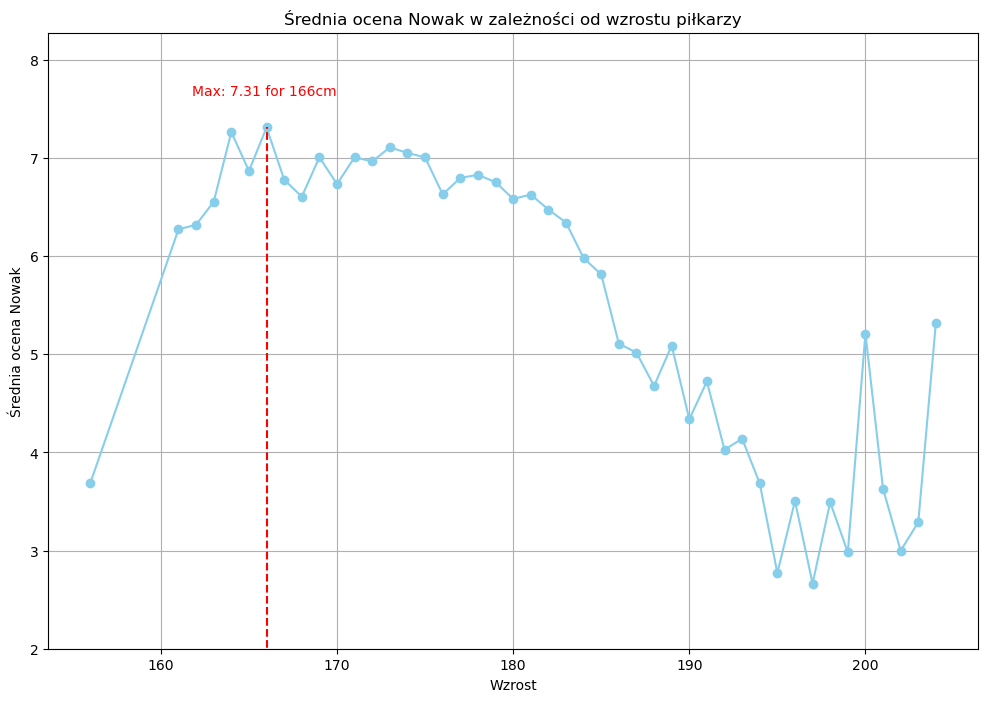

In [51]:
average_scores_by_height = sorted_data.groupby('height')['Nowak Score'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
max_score = average_scores_by_height.max()
max_height = average_scores_by_height.idxmax()
plt.vlines(x=max_height, ymin=-12, ymax=max_score, color='r', linestyle='--', label=f'Max: {max_score:.2f}')
plt.text(max_height+4, max_score+0.3, f'Max: {max_score:.2f} for {max_height:.0f}cm', va='bottom', ha='right', color='r')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena Nowak')
plt.title('Średnia ocena Nowak w zależności od wzrostu piłkarzy')
plt.ylim(2, )
plt.grid(True)
plt.show()

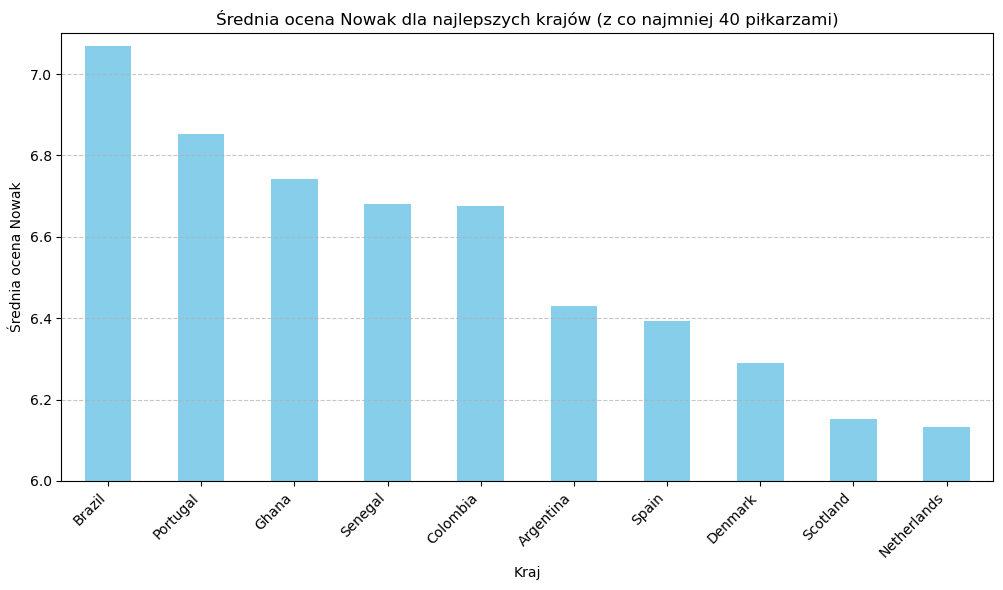

In [52]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['Nowak Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena Nowak')
plt.title('Średnia ocena Nowak dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(6, 7.1)

plt.show()

## Porównanie metod
### - normalizacja wyników

In [63]:
normalized_scores = data[['age', 'height', 'country', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
columns_to_normalize = ['TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']
normalized_scores.loc[:, columns_to_normalize] = (normalized_scores[columns_to_normalize] - normalized_scores[columns_to_normalize].min()) / (normalized_scores[columns_to_normalize].max() - normalized_scores[columns_to_normalize].min())

### - w zależności od wieku piłkarzy

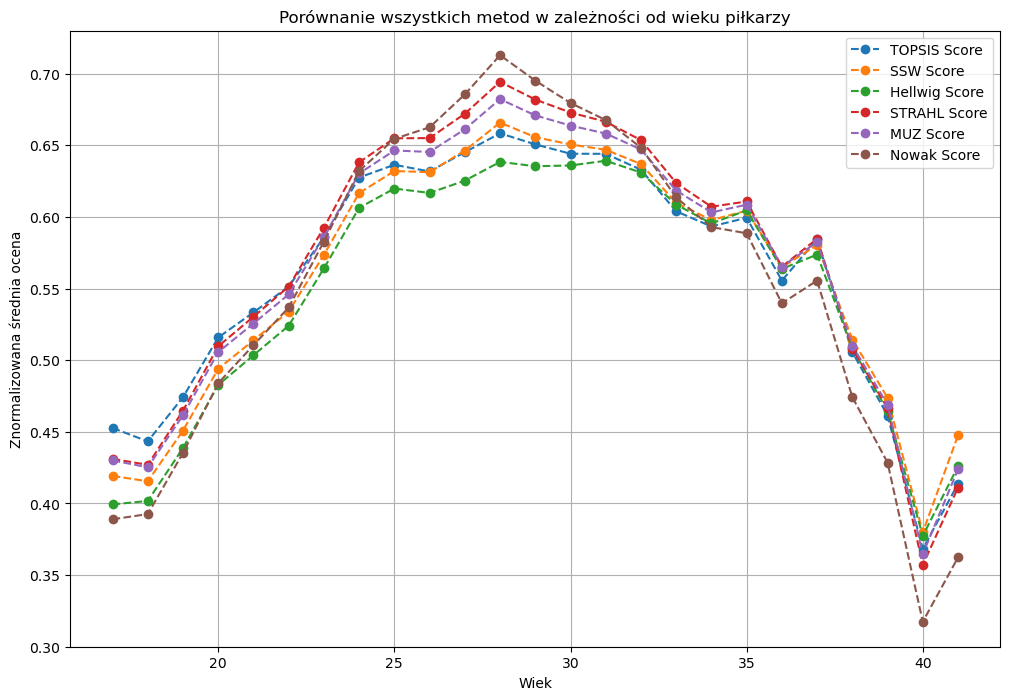

In [64]:
average_scores_by_age = normalized_scores[['age', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
average_scores_by_age = average_scores_by_age.groupby('age').mean()

plt.figure(figsize=(12, 8))

for column in average_scores_by_age.columns:
    plt.plot(average_scores_by_age.index, average_scores_by_age[column], marker='o', linestyle='--', label=column)

plt.ylim(0.3, 0.73)
plt.xlabel('Wiek')
plt.ylabel('Znormalizowana średnia ocena')
plt.title('Porównanie wszystkich metod w zależności od wieku piłkarzy')
plt.grid(True)
plt.legend()
plt.show()

### - w zależności od kraju piłkarzy

### - w zależności od wzrostu piłkarzy

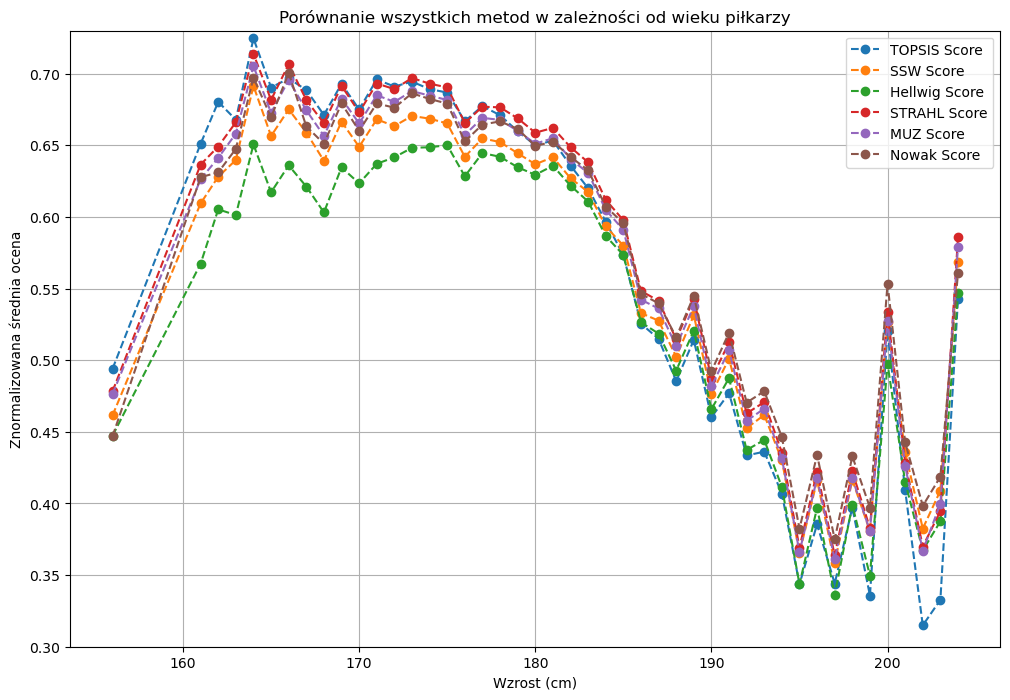

In [66]:
average_scores_by_height = normalized_scores[['height', 'TOPSIS Score', 'SSW Score', 'Hellwig Score', 'STRAHL Score', 'MUZ Score', 'Nowak Score']]
average_scores_by_height = average_scores_by_height.groupby('height').mean()

plt.figure(figsize=(12, 8))

for column in average_scores_by_height.columns:
    plt.plot(average_scores_by_height.index, average_scores_by_height[column], marker='o', linestyle='--', label=column)

plt.ylim(0.3, 0.73)
plt.xlabel('Wzrost (cm)')
plt.ylabel('Znormalizowana średnia ocena')
plt.title('Porównanie wszystkich metod w zależności od wieku piłkarzy')
plt.grid(True)
plt.legend()
plt.show()

# Wnioski końcowe

NAPISAĆ.

## Bibliografia
- [Regresja liniowa 1](https://matematyka.poznan.pl/artykul/regresja-liniowa-czyli-o-zastosowaniu-funkcji-liniowej-w-analizie-statystycznej/)
- [Regresja liniowa 2](https://pogotowiestatystyczne.pl/slowniki/regresja-liniowa/)
- [SSW](https://study.com/skill/learn/how-to-calculate-the-total-sum-of-squares-within-and-between-ssw-and-ssb-explanation.html)
- [TOPSIS](https://repozytorium.uwb.edu.pl/jspui/bitstream/11320/7542/1/Optimum_4_2018_D_Kacprzak_Przedzialowa_metoda_TOPSIS.pdf)